<font color='blue'><h3> Importation des modules</h3> </font>

In [394]:
# System imports
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

#Extra library imports
from PIL import Image
from scipy import optimize
import scipy.ndimage as ndi

import pandas as pd 

<font color='blue'><h3> Image importation </h3> </font>

In [395]:
# Get the patient image and manual segmentation paths
datadir = 'test_data-20220525' 
impaths =np.sort(glob.glob( os.path.join(datadir, '*.tiff')))

In [396]:
#afficher liste des chemin 
print(impaths[0:7])

['test_data-20220525/im-000.tiff' 'test_data-20220525/im-001.tiff'
 'test_data-20220525/im-002.tiff' 'test_data-20220525/im-003.tiff'
 'test_data-20220525/im-004.tiff' 'test_data-20220525/im-005.tiff'
 'test_data-20220525/im-006.tiff']


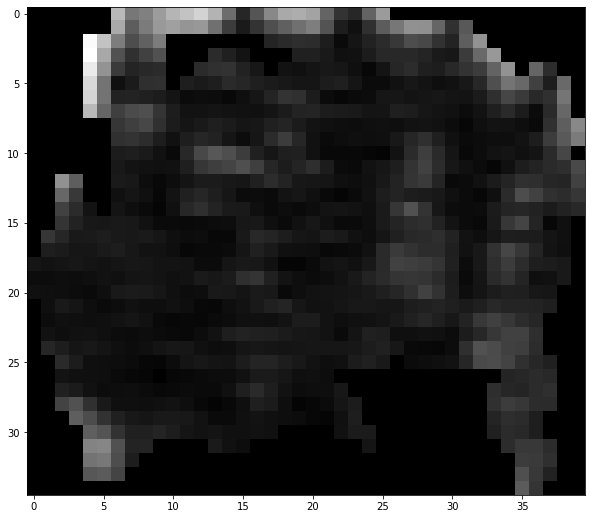

In [397]:
# Afficher_image
im_arr = np.array(Image.open(impaths[0]))
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im_arr, cmap='gray')


<font color='blue'><h3> Importation CSV </h3> </font>

In [398]:
df = pd.read_csv("training_labels.csv")
df

,Image_id,View
0,im-000,axial
1,im-001,axial
2,im-002,axial
3,im-003,coronal
4,im-004,coronal
...,...,...
295,im-295,coronal
296,im-296,axial
297,im-297,coronal
298,im-298,sagittal


<font color='blue'><h3> Classifcation </h3> </font>

In [304]:
#supprimer les element autres que saggital 
""""
df_axial  = df[df["View"]== "axial" ] 
df_coronal = df[df["View"]== "coronal" ] 
df_sagittal = df[df["View"]== "sagittal" ]

path_axial = "axial"
path_sagittal = "sagittal"
path_coronal = "coronal"
df_axial = df[df["View"]== "saggital" ]

#axial
for i in df_sagittal["Image_id"]:
    path = os.path.join(path_axial,i + '.tiff')
    os.remove(path)

for i in df_coronal["Image_id"]:
    path = os.path.join(path_axial,i + '.tiff')
    os.remove(path)

#sagittal
for i in df_axial["Image_id"]:
    path = os.path.join(path_sagittal,i + '.tiff')
    os.remove(path)

for i in df_coronal["Image_id"]:
    path = os.path.join(path_sagittall,i + '.tiff')
    os.remove(path)
    

#coronal
for i in df_axial["Image_id"]:
    path = os.path.join(path_coronal,i + '.tiff')
    os.remove(path)

for i in df_sagittal["Image_id"]:
    path = os.path.join(path_coronal,i + '.tiff')
    os.remove(path)"""
    


'"\ndf_axial  = df[df["View"]== "axial" ] \ndf_coronal = df[df["View"]== "coronal" ] \ndf_sagittal = df[df["View"]== "sagittal" ]\n\npath_axial = "axial"\npath_sagittal = "sagittal"\npath_coronal = "coronal"\ndf_axial = df[df["View"]== "saggital" ]\n\n#axial\nfor i in df_sagittal["Image_id"]:\n    path = os.path.join(path_axial,i + \'.tiff\')\n    os.remove(path)\n\nfor i in df_coronal["Image_id"]:\n    path = os.path.join(path_axial,i + \'.tiff\')\n    os.remove(path)\n\n#sagittal\nfor i in df_axial["Image_id"]:\n    path = os.path.join(path_sagittal,i + \'.tiff\')\n    os.remove(path)\n\nfor i in df_coronal["Image_id"]:\n    path = os.path.join(path_sagittall,i + \'.tiff\')\n    os.remove(path)\n    \n\n#coronal\nfor i in df_axial["Image_id"]:\n    path = os.path.join(path_coronal,i + \'.tiff\')\n    os.remove(path)\n\nfor i in df_sagittal["Image_id"]:\n    path = os.path.join(path_coronal,i + \'.tiff\')\n    os.remove(path)'

In [305]:
"""from PIL import Image
m1_arr = Image.open(impaths[0])
test = m1_arr.convert("RGB")
test2  = np.array(test)
sx1, sy1, nb_channels = test2.shape
print(test2.shape)"""

'from PIL import Image\nm1_arr = Image.open(impaths[0])\ntest = m1_arr.convert("RGB")\ntest2  = np.array(test)\nsx1, sy1, nb_channels = test2.shape\nprint(test2.shape)'

 <font color='blue'><h2> Symétrique </h2> </font>

In [306]:
#sagittal pas sysmetrque, les autres oui

 <font color='green'><h5> 
Nous récupérons les types de symétrie présent sur le images, en effet selon la coupe la symétrie est différente. Il y a des symétries horizontales (a = 1), verticale (b=1), et diagonale. J'ai également récupéré la perte, elle peut être utile .Le loss sera élevé, si la qualité de l'image est pas bonne, ou encore que la symétrie n'est pas parfaite. Ainsi l'algorithme aura mesure de la certitude de la symétrie, si faut la prendre en compte de façon sûre ou non.   <br/>
Une autres métriques interessantes est de savoir, le taux de remplissage du cerveau par rapport à la photo. 
Ce ratio est le nombres de pixel du cerveau sur nombres de pixels totals. Ce ratio ne prend donc pas en compte la qualité de l'image. En effet, sur une photo de mauvaises qualités il y a peu de pixel par rapport à une photo de bonnnes qualités. 
</h5> </font>

<font color='green'><h5> 
Notre code fonctionne de la même manière que le TP3, nous récupérons une image.
Nous la retournons si elle est format paysage, ainsi toute les images sont aux formats portraits.
En effet, une image au format paysage qui a une symétrie horizontale est équivalent à une symétrie vertical au format portrait....Nous uniformisons notre cerveau en noir, et le reste en blanc.Nous réduisons la photo à un cadre qui prend uniquement le cerveau. 
De là, nous regardons les symétries, et nous y appliquons un algorithme d optimisation ainsi nous avons une symétrie plus précise et la perte. 
Lorsque l'image est trop abimé ou qu'il n'y a rien... L'algorithme ne reconnait pas de symétrie donc nous y avons inséré une boucle if. Dans ce cas là, l'algorithme y injecte un loss très élevé, pour que le KNN ne prenne pas trop en compte sa symétrie.
</h5> </font>

In [399]:
def symmetry_image_v0(p, arr, background_val):
    
    """ Symmetric image with respect to a line of equation ax + by + c = 0
        
    Parameters
    ----------
    p: vector of floats
        vector containing the line of symmetry with parameters a, b, c
    arr: 2D array
        the input (binary or grey level) image 
    plane
    background_val : float/int
        the background intensity value
        
    Returns
    -------
    sym_arr: 2D array
        the output symmetric image
    """
    
    #Get back the line parameters
    a, b, c = p

    # Image size and type
    s1, s2 = arr.shape
    arr_type = type(arr[0, 0])
    
    # Coordinates of the region of interest
    [x, y] = np.where(arr > 0)

    # Coordinates (xr, yr) of the symmetric point of (x, y) with respect to
    #  a vertical line in the image system 
    if a == 0 and b != 0:              
        yr = (-y)-(2*(c/b))
        xr = x
    # Coordinates (xr, yr) of the symmetric point of (x, y) with respect to  
    # an horizontal line in the image system 
    elif a != 0 and b == 0:        
        xr = (-x)-(2*(c/a))
        yr = y

    # Coordinates (xr, yr) of the symmetric point of (x, y) with respect to 
    # any different line     
    else:
        xr = x-((2*a)*(a*x+b*y+c))/(a**2+b**2)
        yr = y-((2*b)*(a*x+b*y+c))/(a**2+b**2)
        
    #cast to integer and only keep coordinates within the image ! 
    xr = (np.round(xr)).astype(int)
    yr = (np.round(yr)).astype(int)

    x = x[xr < s1]
    y = y[xr < s1]
    yr = yr[xr < s1]
    xr = xr[xr < s1]
    
    x = x[yr < s2]
    y = y[yr < s2]    
    xr = xr[yr < s2]
    yr = yr[yr < s2]

    x = x[xr >= 0]
    y = y[xr >= 0]  
    yr = yr[xr >= 0]
    xr = xr[xr >= 0]

    x = x[yr >= 0]
    y = y[yr >= 0] 
    xr = xr[yr >= 0]
    yr = yr[yr >= 0]

    # Take into account the background value
    if background_val == 0:
        sym_arr = np.zeros((s1, s2), dtype=arr_type)
    else:
        sym_arr = background_val * np.ones((s1, s2), dtype=arr_type)
    
    # Compute the symmetric array
    for i in range(len(xr)):
        sym_arr[xr[i], yr[i]] = arr[x[i], y[i]]
        
    return sym_arr

In [400]:
def symmetry_image(p, arr, background_val):
    
    """ Symmetry image by a line of equation ax + by + c = 0
        
    Parameters
    ----------
    p: vector
        vector containing the symmetry line parameters a, b, c
    arr: 2D array
        the input (binary or grey level) image (non negative intensities)
    plane
    background_val : float/int
        the background intensity value
        
    Returns
    -------
    sym_arr: 2D array
        the output symmetry image
    """
    
    a, b, c = p

    # Image size
    s1, s2 = arr.shape
    arr_type = type(arr[0, 0])
    
    # Coordinates of the whole image
    y_arr, x_arr = np.meshgrid(range(s2), range(s1))
    xr = x_arr.flatten()
    yr = y_arr.flatten()

    # Coordinates (x, y) of the input point as a function of its symmetric 
    # point (xr, yr) with respect to a vertical line in the image system 
    if a == 0 and b != 0:     
        y = (-yr)-(2*(c/b))
        x = xr

    # Coordinates (x, y) of the input point as a function of its symmetric 
    # point (xr, yr) with respect to an horizontal line in the image system    
    elif a != 0 and b == 0:       
        x = (-xr)-(2*(c/a))
        y = yr       
    else:
    # Coordinates (x, y) of the input point as a function of its symmetric 
    # point (xr, yr) with respect to any different line
        x = xr-((2*a)*(a*xr+b*yr+c))/(a**2+b**2)
        y = yr-((2*b)*(a*xr+b*yr+c))/(a**2+b**2)

        
    #cast to integer and only keep coordinates within the image ! 
    x = (np.round(x)).astype(int)
    y = (np.round(y)).astype(int)

    xr = xr[x < s1]
    yr = yr[x< s1]
    y = y[x < s1]
    x = x[x < s1]
    
    xr = xr[y < s2]
    yr = yr[y < s2]    
    x= x[y < s2]
    y= y[y < s2]
    
    xr = xr[x >= 0]
    yr = yr[x >= 0]  
    y = y[x >= 0]
    x = x[x >= 0]

    xr = xr[y >= 0]
    yr = yr[y >= 0] 
    x = x[y >= 0]
    y = y[y >= 0]

    # Consider the background
    if background_val == 0:
        sym_arr = np.zeros((s1, s2), dtype=arr_type)
    else:
        sym_arr = background_val * np.ones((s1, s2), dtype=arr_type)
    
    # Create the symmetry array
    for i in range(len(xr)):
        sym_arr[xr[i], yr[i]] = arr[x[i], y[i]]
        
    return sym_arr

In [309]:
#Initialize the vector of loss values
global losses

# Define the loss function
def sym_loss(p, arr=input_arr, mask_arr=mask1_arr, background_val=back_val):   
    
    """
    Parameters
    ----------
    p: 3-uplet
        vector containing the symmetry line parameters a, b, c
    arr: 2D array
        the input (binary or grey level) image 
    plane
    mask_arr: 2D array
        the input binary mask
    plane
    background_val : float/int
        the background intensity value
        
    Returns
    -------
    loss: float
        the loss value
    """

    # Image size
    s1, s2 = arr.shape   

    # Symmetric image with respect to the input line
    sym_arr = symmetry_image(p, arr, background_val)

    # Compute the current loss value
    loss = np.mean((arr[mask_arr == 1]-sym_arr[mask_arr == 1])**2)
    
    #Update the vector of loss values
    losses.append(loss)

    return loss

In [401]:
liste_horizontal = []
liste_verticale = []
liste_diagonal = []
brain_area = []
perte = []
numero = []
for i in range(len(impaths)) : 
    numero.append(i)
    image = Image.open(impaths[i])
    rotated = image.width> image .height
    print(i)
    if rotated:
        image = image.rotate(270,expand=True)
        im_arr = np.array(image)
    else : 
        im_arr = np.array(image)
    
    mask1_arr = (im_arr >= 0.2 * np.max(im_arr)).astype(int)
    sx1, sy1 = im_arr.shape

    #Unification
    ccs_arr, nb_ccs = ndi.label(1 - mask1_arr)
    cc_ids = list(range(1, nb_ccs + 1))
    border_arr = np.zeros((sx1, sy1)).astype(int)
    border_arr[0, :] = 1
    border_arr[sx1-1, :] = 1
    border_arr[:, 0] = 1
    border_arr[:, sy1-1] = 1
    border_cc_ids = np.unique(ccs_arr[border_arr == 1])
    border_cc_ids = list(border_cc_ids[border_cc_ids > 0])
    cc_ids = list(set(cc_ids) - set(border_cc_ids))  
    for cc_id in cc_ids:
        mask1_arr[ccs_arr == cc_id] = 1     

    mask1_arr = ndi.binary_fill_holes(mask1_arr).astype(int)
    [x1, y1] = np.where(mask1_arr == 1)
    [xtest, ytest] = np.where(mask1_arr == 0)
    area = len(xtest)/(len(x1)+len(xtest))
    #print('The butterfly mask is composed of {0} pixels'.format(len(x1)))
    brain_area.append(area)
    bb1_arr = np.zeros((sx1, sy1)).astype(int)
    bb1_arr[np.min(x1):np.max(x1)+1, np.min(y1):np.max(y1)+1] = 1
    [x2, y2] = np.where(bb1_arr == 1)
    #print('The percentage of butterfly pixels included in the bounding box is {0} %'.format(len(x2)/len(x1)*100))
    [x1, y1] = np.where(bb1_arr == 1)
    [x2, y2] = np.where(mask1_arr == 1)
    #print('The percentage of the bounding box that is occupied by the butterfly mask is {0} %'.format(len(x2)/len(x1)*100))

    # Coordinates of the center of the bounding box
    x1_bb_center = int(np.round(0.5 * (np.max(x1) - np.min(x1)) + np.min(x1)))
    y1_bb_center = int(np.round(0.5 * (np.max(y1) - np.min(y1)) + np.min(y1)))
    line1_arr = np.zeros((sx1, sy1)).astype(int)
    line1_arr[:, y1_bb_center] = 1
    line2_arr = np.zeros((sx1, sy1)).astype(int)
    line2_arr[x1_bb_center, :] = 1

    #symetrique image
    input_arr = np.copy(mask1_arr)
    back_val = np.min(input_arr)
    s1, s2 = input_arr.shape
    y_arr, x_arr = np.meshgrid(range(s2), range(s1)) 
    
    if (sx1 - 1)!=0 :
        init_ps = [[0, 1, -y1_bb_center], 
                   [1, 0, -x1_bb_center],
                   [(sy1 - 1) / (sx1 - 1), 1 , -sy1 - 1.5]]

        for init_p in init_ps:
            sym_arr = symmetry_image_v0(init_p, input_arr, back_val)
            a, b, c = init_p
            line_arr = (np.abs(a * x_arr + b * y_arr + c) <= 1).astype(int)


        #Check your improved algorithm
        for init_p in init_ps:
            #Symmetric image with given parameters
            sym_arr = symmetry_image(init_p, input_arr, back_val)

            #Symmetric line array
            a, b, c = init_p
            line_arr = (np.abs(a * x_arr + b * y_arr + c) <= 1).astype(int)


        # Initialize the list containing the loss evolution
        losses = []

        for init_p in init_ps:
            sym_loss(init_p, input_arr, mask1_arr,  back_val)
        #print("The best initial loss value is :", min(losses))

        sym_arr = symmetry_image(init_p, input_arr, back_val)

        for init_p in init_ps:
            if min(losses)==sym_loss(init_p, input_arr, mask1_arr,  back_val):
                init_p1=init_p
        #print("The associated parameters are : a=", init_p1[0],", b=", init_p1[1], ", c=", init_p1[2])
        liste_horizontal.append(init_p1[0])
        liste_verticale.append(init_p1[1])
        liste_diagonal.append(init_p1[2])

        losses = []
        nelder_mead_method = optimize.minimize(fun=sym_loss, x0=init_p1, method='Nelder-Mead', options={'return_all':True})
        optimize.OptimizeResult(nelder_mead_method)
        optimize.OptimizeResult(nelder_mead_method).allvecs
        losses=[]
        init_p2 = optimize.OptimizeResult(nelder_mead_method).final_simplex[0][3]
        sym_arr = symmetry_image(init_p2, input_arr, back_val)

        a, b, c = init_p2
        line_arr = (np.abs(a * x_arr + b * y_arr + c) <= 1).astype(int)

        sym_loss(init_p2, input_arr, mask1_arr,  back_val)
        perte.append(losses[0])

    else : 
        liste_horizontal.append(0)
        liste_verticale.append(0)
        liste_diagonal.append(init_p1[2])
        perte.append(1)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [402]:
#sym =np.concatenate((liste_horizontal, liste_verticale), axis=1)
#sym = pd.DataFrame(sym)
#len(liste_horizontal)
#len(liste_verticale)
liste_verticale = pd.DataFrame(liste_verticale)
liste_horizontal = pd.DataFrame(liste_horizontal)
liste_diagonale =pd.DataFrame(liste_diagonal)
brain_area = pd.DataFrame(brain_area)
impa = pd.DataFrame(impaths[1:300])
perte =  pd.DataFrame(perte)
brain_area

,0
0,0.871429
1,0.413699
2,0.415368
3,0.239824
4,0.385490
...,...
95,0.417421
96,0.334915
97,0.468750
98,0.223105


In [403]:
df3_final = pd.concat([impa, brain_area,liste_verticale, liste_horizontal,liste_diagonale,perte],axis=1)
df3_final.columns =  ['impa','brain_area', 'liste_verticale', 'liste_horizontal','liste_diagonale','perte']
df3_final

,impa,brain_area,liste_verticale,liste_horizontal,liste_diagonale,perte
0,test_data-20220525/im-001.tiff,0.871429,0,1.000000,-20.0,1.000000
1,test_data-20220525/im-002.tiff,0.413699,0,1.000000,-36.0,1.000000
2,test_data-20220525/im-003.tiff,0.415368,1,0.942029,-67.5,1.000000
3,test_data-20220525/im-004.tiff,0.239824,1,0.000000,-36.0,1.000000
4,test_data-20220525/im-005.tiff,0.385490,1,0.000000,-44.0,0.942034
...,...,...,...,...,...,...
95,test_data-20220525/im-096.tiff,0.417421,1,0.000000,-50.0,0.693366
96,test_data-20220525/im-097.tiff,0.334915,0,1.000000,-58.0,0.721967
97,test_data-20220525/im-098.tiff,0.468750,0,1.000000,-16.0,1.000000
98,test_data-20220525/im-099.tiff,0.223105,1,0.000000,-49.0,0.751325


 <font color='blue'> <h3> Cercle </h3> </font>

<font color='green'> <h4> Concernant la circularité nous nous sommes intéressés par le calcul de métriques comme l'indice de Jaccard, également appelé Intersection sur Union (IoU), calculé entre deux images 𝐴 et 𝐵.
La formule de l'intersection sur Union est la suivante :
IoU = |𝐴∩𝐵| / |𝐴∪𝐵|
Ainsi, l'IoU prend ses valeurs dans [0,1] , 0 signifiant que 𝐴 et 𝐵 ne se chevauchent pas, et 1 que 𝐴=𝐵.
Cela signifie que plus la valeur sera proche de 1 pour l'image semblera circulaire et inversement plus nous aurons un résultat proche de 0 et moins l'image sera circulaire.
Nous avons donc comparé l'image binaire du cercle rempli de centre (x0, y0) et de rayon r0 par rapport au périmètre du cerveau.
Cette métrique a comme avantage d'être facile à interpréter

 </h4> </font>
 
 

In [404]:
def predict(P, alpha, beta, gamma):

    """
    The function to fit 
    
    
    Parameters
    ----------
    P: 2xn array
        the array containing the x (first line) and y (second line) values 
    alpha: float
        the alpha parameter
    beta: float
        the beta parameter
    gamma: float
        the gamma parameter
        
    Returns
    -------
    pred_p: vector
        the values of the fitted input data (the z values)
        
    Command:
    pred_p = predict(P, alpha, beta, gamma)
    
    """
        
    # Divide the input vector into x and y
    x, y = P[0, :], P[1, :]
    
    # Vector of predictions according to the model 
    pred_p = alpha*x + beta*y + gamma
    
    return pred_p

In [405]:
IO = []
for i in range(len(impaths)) : 
    numero.append(i)
    im_arr = np.array(Image.open(impaths[i]))
    mask1_arr = (im_arr >= 0.2 * np.max(im_arr)).astype(int)
    sx1, sy1 = im_arr.shape
    """fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(mask1_arr, cmap='gray')
    ax.axis('off')
    plt.title('A first butterfly mask')
    plt.show()"""


    sx1, sy1 = im_arr.shape

        #Unification
    ccs_arr, nb_ccs = ndi.label(1 - mask1_arr)
    cc_ids = list(range(1, nb_ccs + 1))
    border_arr = np.zeros((sx1, sy1)).astype(int)
    border_arr[0, :] = 1
    border_arr[sx1-1, :] = 1
    border_arr[:, 0] = 1
    border_arr[:, sy1-1] = 1
    border_cc_ids = np.unique(ccs_arr[border_arr == 1])
    border_cc_ids = list(border_cc_ids[border_cc_ids > 0])
    cc_ids = list(set(cc_ids) - set(border_cc_ids))  
    for cc_id in cc_ids:
        mask1_arr[ccs_arr == cc_id] = 1     



    seg_arr =  (mask1_arr > 0).astype('int')

    # Compute the distance map
    map_arr = ndi.distance_transform_edt(seg_arr)

    # Threshold the distance map
    perim_arr = ((map_arr <= 1) & (seg_arr > 0)).astype(int)


    [x, y] = np.where(perim_arr == 1)
    [x0, y0] = np.where(seg_arr==1)
    x0 = np.mean(x0)
    y0 = np.mean(y0)

    # Initialize the radius
    r0 = np.mean(np.sqrt((x-x0)**2+(y-y0)**2))


    # Create the binary image of the (filled) circle of center (x0, y0) and radius r0
    sx, sy = seg_arr.shape
    y_arr, x_arr = np.meshgrid(range(sy), range(sx))
    circle_arr = (((x_arr - x0)**2+(y_arr-y0)**2)<=r0**2).astype(int)

    # Concatenate x and y
    P = np.vstack((x, y))

    # Compute the vector of the z_i values
    x = P[0, :]
    y = P[1, :]
    Z = x**2 + y**2

    # Initialize the vector of variable values
    p0 = [2*x0, 2*y0, r0**2-x0**2-y0**2]
    alpha = p0[0]
    beta = p0[1]
    gamma = p0[2]

    # Display the initial loss value
    loss_initial= np.mean((Z-(p0[0]*x+p0[1]*y+p0[2]))**2)/2

    if len(Z) == 1 : 
        IO.append(1)
        print("yes")
    
    else :
        lev_marq = optimize.curve_fit(predict,P,Z,p0=p0)


        # Compute and display the final loss value
        loss_final= np.mean((Z-(lev_marq[0][0]*x+lev_marq[0][1]*y+lev_marq[0][2]))**2)/2


        # Retrieve the parameter values
        xc = lev_marq[0][0]/2
        yc = lev_marq[0][1] /2
        r = np.sqrt(lev_marq[0][2] +xc**2 + yc**2)



        # Compute the binary image of the optimized fitted circle
        circle_arr = ((x_arr-xc)**2+(y_arr-yc)**2 <= r*r).astype('int')

        # Display the image, the tumor contours and the optimized fitted circle
        """fig, ax = plt.subplots(figsize=(5, 5))
        ax.imshow(im_arr)
        ax.contour(seg_arr)
        ax.scatter(y0,x0,c='cyan')
        ax.contour (circle_arr, colors = 'r')"""



        # Compute and display the IoU metric
        iou = np.sum(seg_arr[circle_arr == 1])/(np.sum(seg_arr)+np.sum(circle_arr[seg_arr == 0]))
        #print('IoU value: {0}'.format(iou))
        IO.append(iou)

        


In [407]:
IO_final= pd.DataFrame(IO)
IO_final.columns =['IO']
df3_final = pd.concat([df3_final, IO_final],axis=1)
df3_final


,impa,brain_area,liste_verticale,liste_horizontal,liste_diagonale,perte,IO
0,test_data-20220525/im-001.tiff,0.871429,0,1.000000,-20.0,1.000000,0.062678
1,test_data-20220525/im-002.tiff,0.413699,0,1.000000,-36.0,1.000000,0.538745
2,test_data-20220525/im-003.tiff,0.415368,1,0.942029,-67.5,1.000000,0.765356
3,test_data-20220525/im-004.tiff,0.239824,1,0.000000,-36.0,1.000000,0.837219
4,test_data-20220525/im-005.tiff,0.385490,1,0.000000,-44.0,0.942034,0.761603
...,...,...,...,...,...,...,...
95,test_data-20220525/im-096.tiff,0.417421,1,0.000000,-50.0,0.693366,0.556995
96,test_data-20220525/im-097.tiff,0.334915,0,1.000000,-58.0,0.721967,0.835585
97,test_data-20220525/im-098.tiff,0.468750,0,1.000000,-16.0,1.000000,0.346154
98,test_data-20220525/im-099.tiff,0.223105,1,0.000000,-49.0,0.751325,0.900285


<font color='red'> <h2> Choix de l'algorithme de machine learning </h2> </font>

 <font color='blue'> <h3> KNN -- Test </h3> </font>

In [316]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [409]:
df_view = df["View"]
df5_final =df3_final.iloc[:, 1:7]
df5_final

,brain_area,liste_verticale,liste_horizontal,liste_diagonale,perte,IO
0,0.871429,0,1.000000,-20.0,1.000000,0.062678
1,0.413699,0,1.000000,-36.0,1.000000,0.538745
2,0.415368,1,0.942029,-67.5,1.000000,0.765356
3,0.239824,1,0.000000,-36.0,1.000000,0.837219
4,0.385490,1,0.000000,-44.0,0.942034,0.761603
...,...,...,...,...,...,...
95,0.417421,1,0.000000,-50.0,0.693366,0.556995
96,0.334915,0,1.000000,-58.0,0.721967,0.835585
97,0.468750,0,1.000000,-16.0,1.000000,0.346154
98,0.223105,1,0.000000,-49.0,0.751325,0.900285


In [423]:
X = df5
Y=df_view


#On sépare  de façon aléatoire le jeux données en un jeu de test, un jeu d'entrainement. 
#1/3 je de test, et 1/3 jeu d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

#On normalise les données, afin que certaines variables ne pèsent pas plus que d'autres.
#En effet, symétrie diagonale peut être élevé alors que symétrie verticale est 0 ou un 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

#Résultat prédiction
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(round(cm.trace()/cm.sum(),3))
print(classification_report(y_test, y_pred))






[[24  8  2]
 [ 0 26  1]
 [ 5  0 24]]
0.822
              precision    recall  f1-score   support

       axial       0.83      0.71      0.76        34
     coronal       0.76      0.96      0.85        27
    sagittal       0.89      0.83      0.86        29

    accuracy                           0.82        90
   macro avg       0.83      0.83      0.82        90
weighted avg       0.83      0.82      0.82        90



Text(0, 0.5, 'Mean Error')

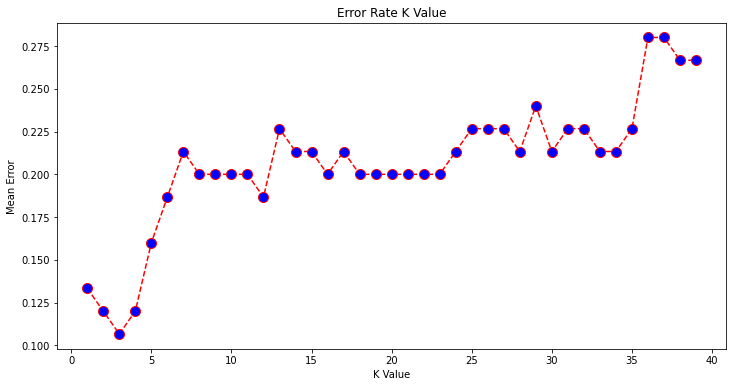

In [319]:
#Le but de cet algorithme est de visualiser le taux d'erreur en fonction du nombres de voisins. 
#Ansi nous trouvons le nombre de voisin optimal
#Ce nombre nous l'appliquerons au vrai jeu de données a testé. 
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))



plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

 <font color='green'> <h4> Nous voyons que le nombre optimal de voisin est trois, nous allons donc donc l'appliquer sur le test final  </h4> </font>

 <font color='blue'> <h3> Decision Tree -- Test </h3> </font>

In [427]:
from sklearn import tree

X2 = df5
Y2=df_view


#On sépare  de façon aléatoire le jeux données en un jeu de test, un jeu d'entrainement. 
#1/3 je de test, et 1/3 jeu d'entrainement
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2,test_size=0.30, random_state=42)

#On normalise les données, afin que certaines variables ne pèsent pas plus que d'autres.
#En effet, symétrie diagonale peut être élevé alors que symétrie verticale est 0 ou un 

X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(X_train2,Y_train2 )
prediction = clf.predict(X_test2)
print(prediction)


#ree.plot_tree(clf)
#Résultat prédiction
cm2 = confusion_matrix(Y_test2, prediction)
print(classification_report(Y_test2, prediction))
print(round(cm2.trace()/cm2.sum(),3))
#Y_pred2




['axial' 'sagittal' 'coronal' 'axial' 'axial' 'axial' 'sagittal' 'coronal'
 'axial' 'sagittal' 'axial' 'axial' 'coronal' 'sagittal' 'coronal'
 'coronal' 'coronal' 'axial' 'coronal' 'sagittal' 'coronal' 'axial'
 'sagittal' 'sagittal' 'sagittal' 'coronal' 'sagittal' 'coronal'
 'sagittal' 'axial' 'axial' 'axial' 'sagittal' 'sagittal' 'sagittal'
 'axial' 'axial' 'coronal' 'coronal' 'coronal' 'sagittal' 'coronal'
 'coronal' 'coronal' 'coronal' 'sagittal' 'sagittal' 'sagittal' 'axial'
 'coronal' 'sagittal' 'coronal' 'coronal' 'coronal' 'coronal' 'sagittal'
 'axial' 'sagittal' 'coronal' 'coronal' 'sagittal' 'axial' 'axial' 'axial'
 'axial' 'coronal' 'sagittal' 'sagittal' 'sagittal' 'coronal' 'sagittal'
 'axial' 'axial' 'coronal' 'sagittal' 'axial' 'coronal' 'coronal' 'axial'
 'axial' 'sagittal' 'axial' 'coronal' 'coronal' 'coronal' 'sagittal'
 'coronal' 'coronal' 'axial' 'axial']
              precision    recall  f1-score   support

       axial       0.79      0.58      0.67        38
     

<font color='green'> <h4> Nous allons choisir max_depth =5 sur le test final car il donne de meilleurs résultat que lorsque nous prenons 7 ou d'autres nombres. 
</h4> </font>
    
    

<font color='green'> <h4> Nous  allons choisir l algorithme de KNN, il nous renvoie une accuracy plus élevé au alentour de 80-85% contrairement au decision tree qui a une accuracy de seulement de 70-78%. 
</h4> </font>
    

In [343]:
#MIse en forme des résultats et retour sour forme de CSV 
"""
y_test = pd.DataFrame(y_test)
y_test["n_image"] = y_test.index 
y_test = np.array(y_test)
y_test = pd.DataFrame(y_test)
y_test.columns = ["coupe_initial","n_image"]
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ["coupe_predite"]
df_final = df3 = pd.concat([y_test["n_image"], y_test["coupe_initial"],y_pred["coupe_predite"]],axis=1)
gfg_csv_data = df_final.to_csv(' ', index = True) 
print('\nCSV String:\n', gfg_csv_data) """

'\ny_test = pd.DataFrame(y_test)\ny_test["n_image"] = y_test.index \ny_test = np.array(y_test)\ny_test = pd.DataFrame(y_test)\ny_test.columns = ["coupe_initial","n_image"]\ny_pred = pd.DataFrame(y_pred)\ny_pred.columns = ["coupe_predite"]\ndf_final = df3 = pd.concat([y_test["n_image"], y_test["coupe_initial"],y_pred["coupe_predite"]],axis=1)\ngfg_csv_data = df_final.to_csv(\' \', index = True) \nprint(\'\nCSV String:\n\', gfg_csv_data) '

 <font color='blue'> <h3>DECISION TREE -- RESULTAT VRAI JEU </h3> </font>

In [413]:
X_final_train = df5
Y_final_train= df_view
X_test_final = df5_final

X_train_final = scaler.transform(X_final_train)
X_test_final = scaler.transform(X_test_final)


classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

#Résultat prédiction
y_pred_final = classifier.predict(X_test_final)

#print(confusion_matrix(y_test_final, y_pred))
#cm = confusion_matrix(y_test, y_pred)
#print(round(cm.trace()/cm.sum(),3))
#print(classification_report(y_test, y_pred))
y_pred_final


array(['sagittal', 'axial', 'sagittal', 'sagittal', 'sagittal',
       'sagittal', 'sagittal', 'sagittal', 'coronal', 'sagittal', 'axial',
       'sagittal', 'axial', 'axial', 'sagittal', 'axial', 'axial',
       'sagittal', 'coronal', 'coronal', 'axial', 'axial', 'coronal',
       'axial', 'sagittal', 'axial', 'coronal', 'axial', 'axial',
       'sagittal', 'axial', 'coronal', 'axial', 'sagittal', 'axial',
       'axial', 'coronal', 'coronal', 'coronal', 'sagittal', 'axial',
       'axial', 'sagittal', 'sagittal', 'sagittal', 'axial', 'axial',
       'sagittal', 'coronal', 'axial', 'axial', 'axial', 'axial',
       'sagittal', 'sagittal', 'axial', 'axial', 'sagittal', 'coronal',
       'sagittal', 'axial', 'sagittal', 'axial', 'sagittal', 'sagittal',
       'coronal', 'axial', 'sagittal', 'axial', 'axial', 'axial',
       'sagittal', 'axial', 'coronal', 'axial', 'axial', 'coronal',
       'axial', 'sagittal', 'coronal', 'axial', 'axial', 'axial', 'axial',
       'axial', 'axial', 'cor

In [424]:
len(y_pred_final)

100

In [428]:
final_rendu = pd.DataFrame(y_pred_final)
final_rendu

,0
0,sagittal
1,axial
2,sagittal
3,sagittal
4,sagittal
...,...
95,axial
96,coronal
97,axial
98,axial


In [438]:
test_40 = pd.read_csv('training_labels.csv',sep=",", index_col=None)
test_40 = test_40["Image_id"][0:100]


0     im-000
1     im-001
2     im-002
3     im-003
4     im-004
       ...  
95    im-095
96    im-096
97    im-097
98    im-098
99    im-099
Name: Image_id, Length: 100, dtype: object

In [440]:
df_rendueheh = pd.concat([test_40,final_rendu],axis=1)
df_rendueheh.columns = ["Image_id", "view"]
df_rendueheh

,Image_id,view
0,im-000,sagittal
1,im-001,axial
2,im-002,sagittal
3,im-003,sagittal
4,im-004,sagittal
...,...,...
95,im-095,axial
96,im-096,coronal
97,im-097,axial
98,im-098,axial


In [448]:
Rendu_final_CSV = df_rendueheh.to_csv('test.csv', index = False) 
print('\nCSV String:\n', gfg_csv_data)


CSV String:
 None
